## Ensemble Learning and Model Comparison

Outline of the project:

* [Introduction](#1)
* [Packages & Libraries](#2)
* [Create Dataset](#3)
* [KNN, SVM, DT](#4)
    * [K-Nearest Neighbor (KNN)](#5)
    * [Support Vector Machine (SVM)](#6)
    * [Decision Tree (DT)](#7)
* [Train Data Visualization](#8)
* [Ensemble Modelling](#9)
    * [Random Forest (RF)](#10)
    * [Ada Boost](#11)
    * [Voting Classifier](#12)
* [Model Comparison](#13)

<a id = "1"></a>
### Introduction
<img src="https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/61f7bbd4e90cce440b88ea32_ensemble-learning.png">

Ensemble learning is a general meta approach to machine learning that seeks better predictive performance by combining the predictions from multiple models. The three main classes of ensemble learning methods are bagging, stacking, and boosting, and it is important to both have a detailed understanding of each method and to consider them on your predictive modeling project. In this project, firstly we will create three type data and classify the data points using KNN, SVM, DT, RF, AdaBoost and Voting Classifier models. Finally we will evaluate models and visualize the results. Let's begin with importing required packages and libraries.

<a id = "2"></a>
### Packages and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap #for meshgrid

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier

import warnings
warnings.filterwarnings("ignore")

<a id = "3"></a>
### Create Dataset

In [2]:
# parameters setting
random_state = 42

n_samples = 1000
n_features = 50
n_classes = 2

noise_class = 0.2

X,y = make_classification(n_samples = n_samples, 
                        n_features = n_features,
                        n_classes = n_classes,
                        n_repeated = 0,
                        n_redundant = 0,
                        n_informative = n_features - 1,
                        random_state = random_state,
                        n_clusters_per_class = 1,
                        flip_y = noise_class)

<AxesSubplot:xlabel='0', ylabel='1'>

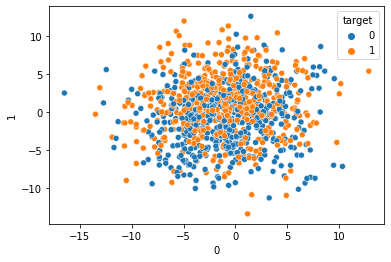

In [3]:
# visualize created data
data = pd.DataFrame(X)
data["target"] = y
plt.figure()
sns.scatterplot(x = data.iloc[:,0], y = data.iloc[:,1], hue = "target", data = data)

In [4]:
data_classification = (X, y)

<AxesSubplot:xlabel='0', ylabel='1'>

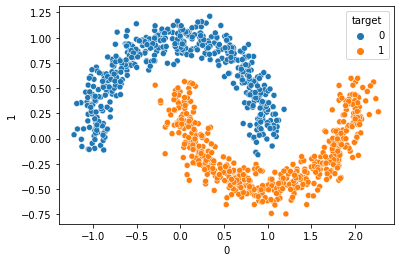

In [5]:
# Make non-linear moon data
n_samples = 1000
noise_moon = 0.1
random_state = 42

moon = make_moons(n_samples = n_samples, noise = noise_moon, random_state = random_state)

# visualize moon data
data = pd.DataFrame(moon[0])
data["target"] = moon[1]
plt.figure()
sns.scatterplot(x = data.iloc[:,0], y = data.iloc[:,1], hue = "target", data = data)

<AxesSubplot:xlabel='0', ylabel='1'>

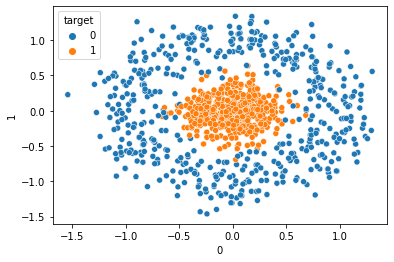

In [6]:
# Make non-linear circle data
n_samples = 1000
noise_circle = 0.2
random_state = 42

circle = make_circles(n_samples = n_samples, noise = noise_circle, random_state = random_state, factor = 0.1)

# visualize circle data
data = pd.DataFrame(circle[0])
data["target"] = circle[1]
plt.figure()
sns.scatterplot(x = data.iloc[:,0], y = data.iloc[:,1], hue = "target", data = data)

In [7]:
datasets = [moon, circle]

Now we got all three dataset. Let's implement basic classifiers!

<a id = "4"></a>
### KNN, SVM, DT

<a id = "5"></a>
#### K-Nearest Neighbor (KNN)

Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

<img src="https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/ef/3a/KNN.component.xl.ts=1639762044031.png/content/adobe-cms/us/en/topics/knn/jcr:content/root/table_of_contents/intro/complex_narrative/items/content_group/image" width = 900, height = 400>

<a id = "6"></a>
#### Support Vector Machine (SVM)

A support vector machine (SVM) is a supervised learning algorithm used for many classification and regression problems , including signal processing  medical applications, natural language processing, and speech and image recognition.

The objective of the SVM algorithm is to find a hyperplane that, to the best degree possible, separates data points of one class from those of another class. “Best” is defined as the hyperplane with the largest margin between the two classes, represented by plus versus minus in the figure below. Margin means the maximal width of the slab parallel to the hyperplane that has no interior data points. Only for linearly separable problems can the algorithm find such a hyperplane, for most practical problems the algorithm maximizes the soft margin allowing a small number of misclassifications.

<img src="https://uk.mathworks.com/discovery/support-vector-machine/_jcr_content/mainParsys/image.adapt.full.medium.jpg/1630399098268.jpg" width = 600, height = 400>

<a id = "7"></a>
#### Decision Tree (DT)

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

<img src="https://e6v4p8w2.rocketcdn.me/wp-content/uploads/2022/04/A-Sample-Decision-Tree-Visualized-1024x712.png" width = 600, height = 400>

We shortly looked at what these models are. Now, let's implement the code!

In [8]:
svc = SVC()
knn = KNeighborsClassifier(n_neighbors = 15)
dt = DecisionTreeClassifier(random_state = 42)

names = ["SVC", "KNN", "Decision Tree"]
classifiers = [svc, knn, dt]

Dataset # 1
SVC: test set score: 1.0 
SVC: train set score: 0.9966666666666667 

KNN: test set score: 1.0 
KNN: train set score: 1.0 

Decision Tree: test set score: 1.0 
Decision Tree: train set score: 1.0 

----------------------------------------
Dataset # 2
SVC: test set score: 0.975 
SVC: train set score: 0.99 

KNN: test set score: 0.97 
KNN: train set score: 0.9833333333333333 

Decision Tree: test set score: 0.9575 
Decision Tree: train set score: 1.0 

----------------------------------------


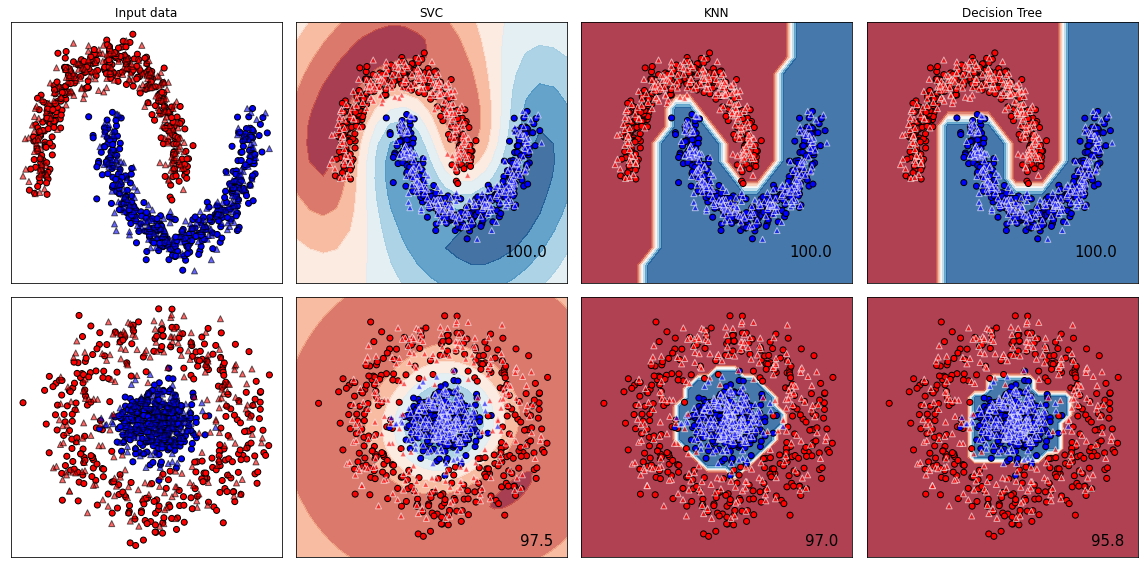

In [9]:
h = 0.2
i = 1

plt.figure(figsize = (16, 8))

for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = RobustScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state = random_state)

    # meshgrid
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # color maps
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000","#0000FF"])
    
    # subplots
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    
    if ds_cnt == 0:
        ax.set_title("Input data")
    
    ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = cm_bright, edgecolors = "k")
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = cm_bright, alpha = 0.6, edgecolors = 'k', marker = "^")
    
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    print("Dataset # {}".format(ds_cnt + 1))
    
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print("{}: test set score: {} ".format(name, score))
        score_train = clf.score(X_train, y_train)
        print("{}: train set score: {} ".format(name, score_train))
        print()
        
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
            
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap = cm, alpha = 0.8)
        
        # plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap = cm_bright, edgecolors = 'k')
        # plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = cm_bright, marker = '^', edgecolors = 'white', alpha = 0.6)
        
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        score = score*100
        ax.text(xx.max() - .3, yy.min() + .3, ('%.1f' % score), size = 15, horizontalalignment = 'right')
        i += 1
    print("----------------------------------------")

plt.tight_layout()
plt.show()

In [10]:
def make_classify(dc, clfs, name):
    x, y = dc
    x = RobustScaler().fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = random_state)
    
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print("{}: test set score: {}".format(name, score))
        score_train = clf.score(X_train, y_train)
        print("{}: train set score: {}".format(name, score_train))
        print()

# Let's evaluate the data created first. parameters that differs from moon and circle: n_features = 50, noise = 0.3
print("Dataset # 0")
make_classify(data_classification, classifiers, names)

Dataset # 0
SVC: test set score: 0.8925
SVC: train set score: 0.94

KNN: test set score: 0.8725
KNN: train set score: 0.885

Decision Tree: test set score: 0.695
Decision Tree: train set score: 1.0



Observations:
* SVM's score is better than others on higher dimensional data especially for binary classification problems
* KNN is more suitable algorithm than SVM on multiclass classification problems (you can see that changing parameters on make_classify function that we define top of the kernel)
* Decision tree algorithm is prone to overfitting and be negatively effected from outliers. Regularization or random forest algorithm can be the solution.